# Relatório de análise VIII

## Identificando e removendo Outliers

In [104]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [105]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


<AxesSubplot:>

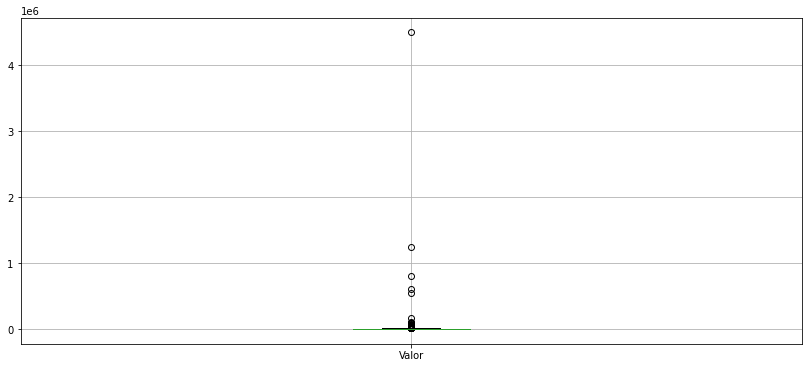

In [106]:
dados.boxplot(['Valor'])

In [107]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [108]:
valor = dados['Valor']

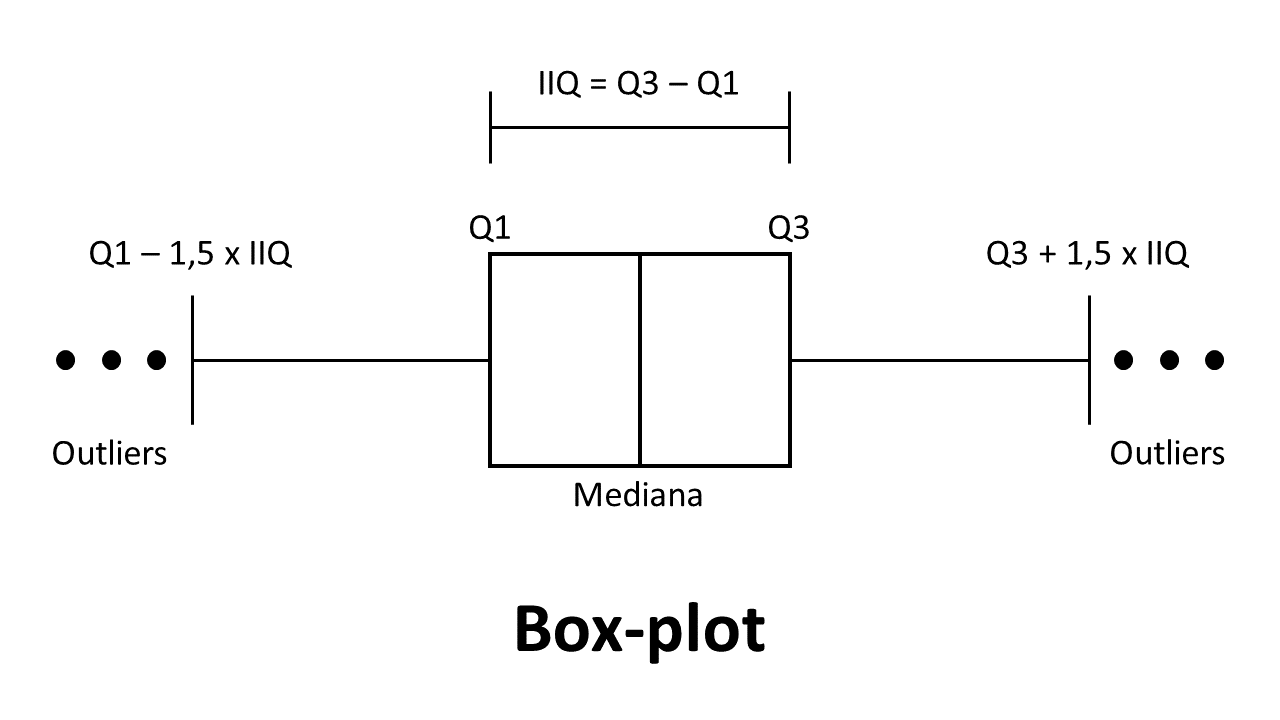

In [109]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [110]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

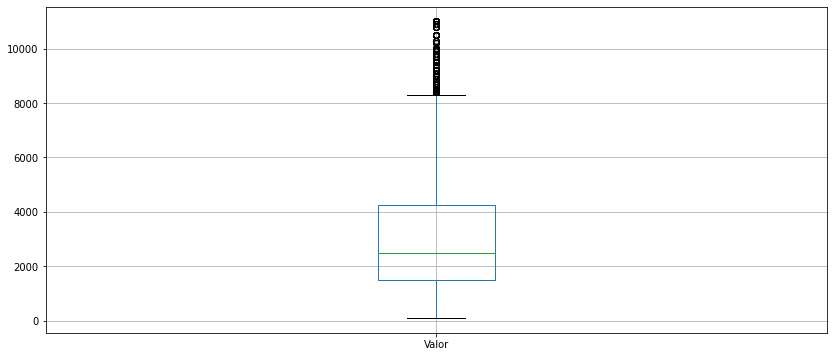

In [111]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

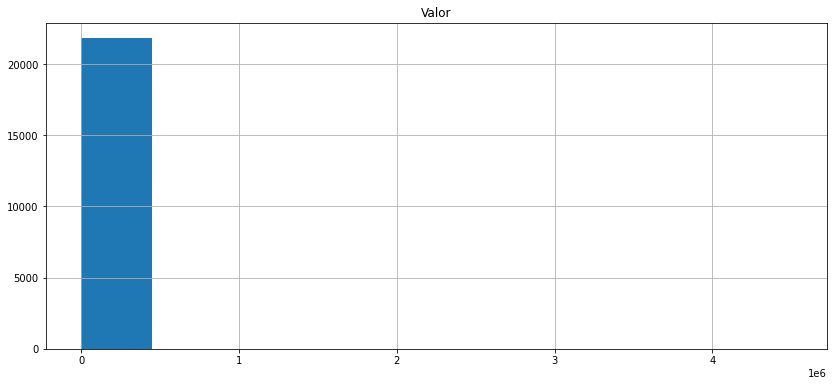

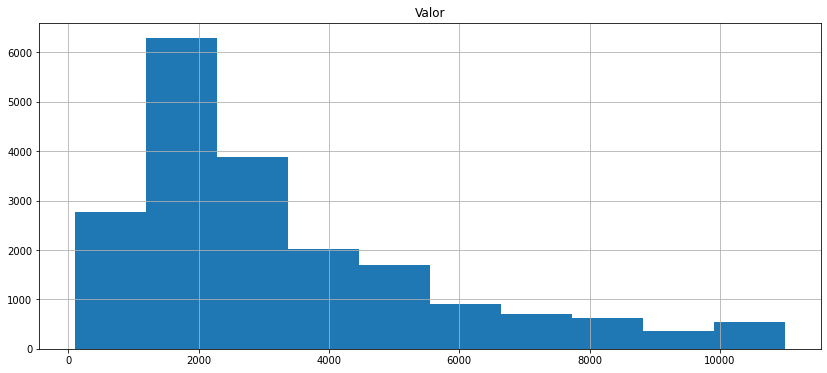

In [112]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Continuação

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

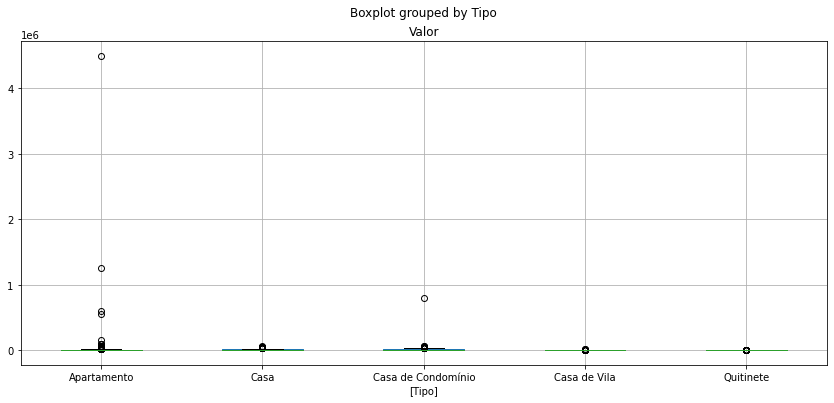

In [136]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [138]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [142]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [144]:
Q1 #dados em formatos diferentes da primeira análise. Agora se tem uma Series 'Tipo'
   #O mesmo vale para: Q3, IIQ, limite_superior, limite_inferior 

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [146]:
Q1['Apartamento']#forma de acessar o arquivo

1700.0

In [147]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

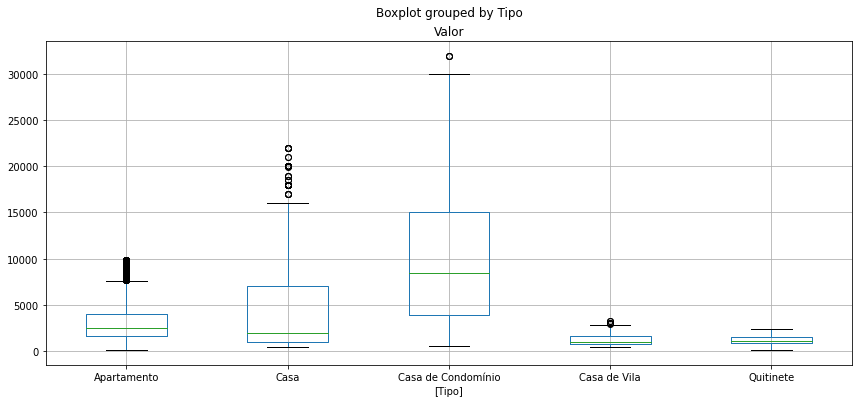

In [148]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [149]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

## Exercícios

In [113]:
dados_exercicio = pd.read_csv('dados/aluguel_amostra.csv', sep=';')
dados_exercicio.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


<AxesSubplot:>

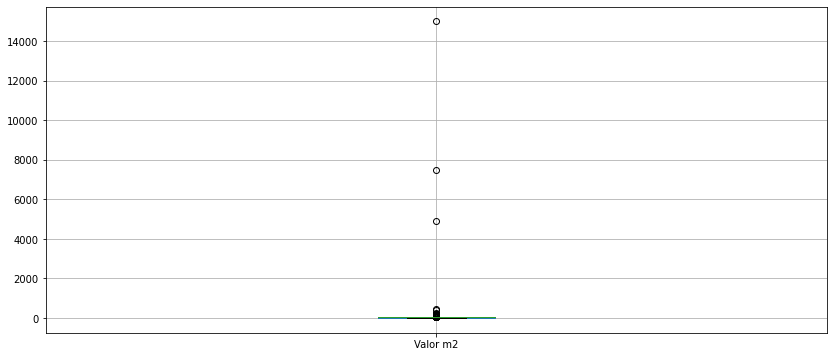

In [133]:
dados_exercicio.boxplot(['Valor m2'])

In [114]:
result = dados_exercicio['Valor m2']

In [135]:
dados_exercicio[dados_exercicio['Valor m2'] >= 200]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
535,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
726,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
1176,Apartamento,Ipanema,3,2,1,167,35000.0,2950.0,652.0,209.58,Apartamento
2293,Apartamento,Barra da Tijuca,4,2,1,20,4800.0,1500.0,0.0,240.00,Apartamento
2738,Apartamento,Ipanema,3,2,1,220,45000.0,3750.0,600.0,204.55,Apartamento
7261,Quitinete,Ipanema,1,0,1,30,6500.0,0.0,0.0,216.67,Apartamento
7493,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento
8398,Casa,Curicica,3,1,2,15,7077.0,0.0,0.0,471.80,Casa
9090,Apartamento,Barra da Tijuca,4,3,4,403,160000.0,3714.0,2000.0,397.02,Apartamento
9739,Apartamento,Leblon,3,1,2,450,100000.0,2400.0,0.0,222.22,Apartamento


In [116]:
q1 = result.quantile(.25)
q3 = result.quantile(.75)
IIq = q3 - q1
limit_inf = q1 - 1.5 * IIq
limit_sup = q3 + 1.5 * IIq

In [117]:
sel = (result >= limit_inf) & (result <= limit_sup)
dados_ex = dados_exercicio[sel]

<AxesSubplot:>

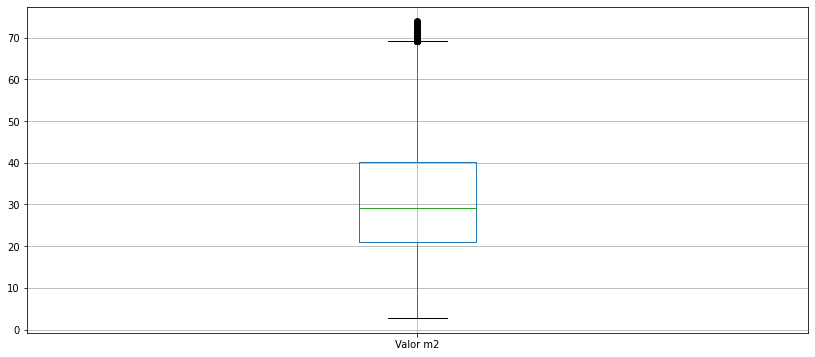

In [118]:
dados_ex.boxplot(['Valor m2'])

In [129]:
print('Valor q1: {}'.format(q1))
print('Valor q3: {}'.format(q3))
print('Valor IIq: {}'.format(IIq))
print('Valor do limite inferior: {}'.format(limit_inf))
print('Valor do limite superior: {}'.format(limit_sup))

Valor q1: 21.25
Valor q3: 42.31
Valor IIq: 21.060000000000002
Valor do limite inferior: -10.340000000000003
Valor do limite superior: 73.9


array([[<AxesSubplot:title={'center':'Valor m2'}>]], dtype=object)

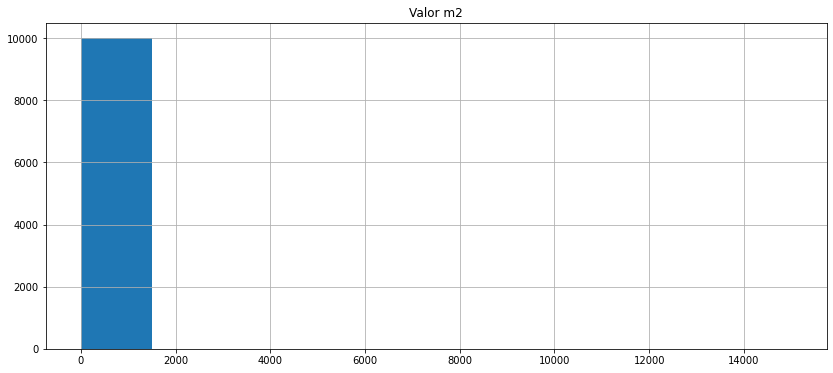

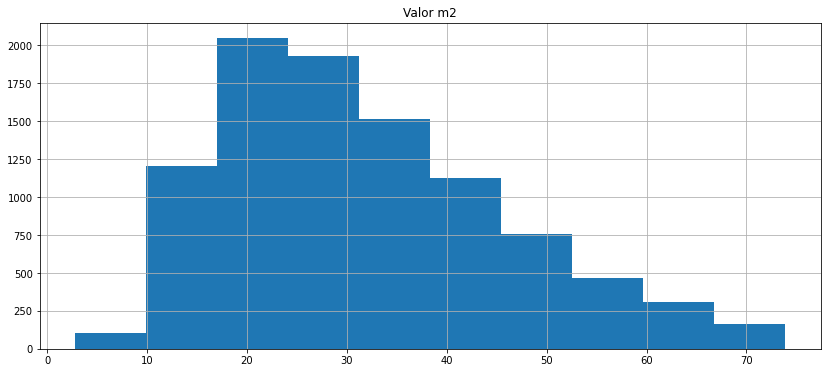

In [150]:
dados_exercicio.hist(['Valor m2'])
dados_ex.hist(['Valor m2'])

In [151]:
#continuação

In [152]:
i = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')
i.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


Text(0.5, 1.0, 'Total de Imóveis por Tipo')

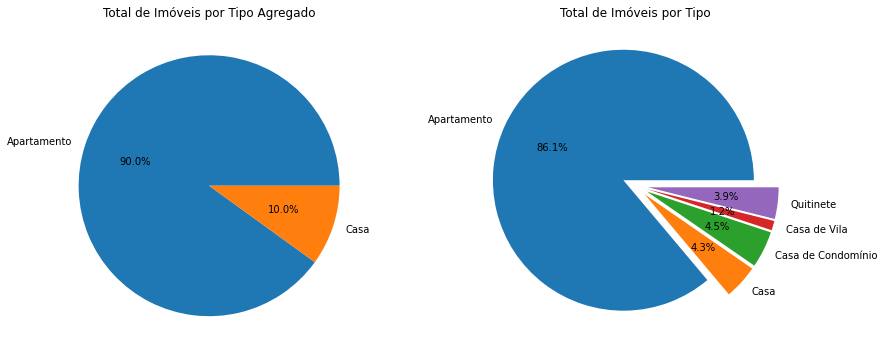

In [155]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = i.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = i.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')